### Acknowledgements

> https://github.com/CSSEGISandData/COVID-19

### Collection methodology

> https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning

### Disclaimer

> * Data is from scrapped from JHU github repository. Any variation in the data there will also reflect in this notebook

### Timeline

In [3]:
# from IPython.core.display import HTML

In [4]:
# HTML('''<div class="flourish-embed flourish-cards" data-src="visualisation/1810417" data-url="https://flo.uri.sh/visualisation/1810417/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

### Ships that had passengers with COVID-19

In [5]:
# HTML('''<div class="flourish-embed flourish-cards" data-src="visualisation/1816605" data-url="https://flo.uri.sh/visualisation/1816605/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

# Libraries

### Libraries

In [6]:
# get latest version of pip
!pip install --upgrade pip

# for calender map
! pip install calmap

# to convert us statenames to state codes
! pip install us

# to get continent name from country name
! pip install pycountry_convert

In [7]:
# math opeations
# import math
# produce random numbers
# import random
# to load json files
import json
from datetime import timedelta
# to get web contents
from urllib.request import urlopen

# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd

In [8]:
# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns

# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [9]:
# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [10]:
# converter
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# to USA states details
# import us

### Color, theme, color palettes

In [11]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# seaborn plot style
# sns.set_style('darkgrid')

# Dataset

In [12]:
# list files
# ==========

# !ls ../input/corona-virus-report

In [13]:
# Full data
# =========

full_table = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv')
# full_table.head()

In [14]:
# Grouped by day, country
# =======================

full_grouped = pd.read_csv('../input/corona-virus-report/full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
# full_grouped.head()

In [15]:
# Day wise
# ========

day_wise = pd.read_csv('../input/corona-virus-report/day_wise.csv')
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
# day_wise.head()

In [16]:
# Country wise
# ============

country_wise = pd.read_csv('../input/corona-virus-report/country_wise_latest.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)
# country_wise.head()

In [17]:
# Worldometer data
# ================

worldometer_data = pd.read_csv('../input/corona-virus-report/worldometer_data.csv')
worldometer_data = worldometer_data.replace('', np.nan).fillna(0)
# worldometer_data.head()

# Latest

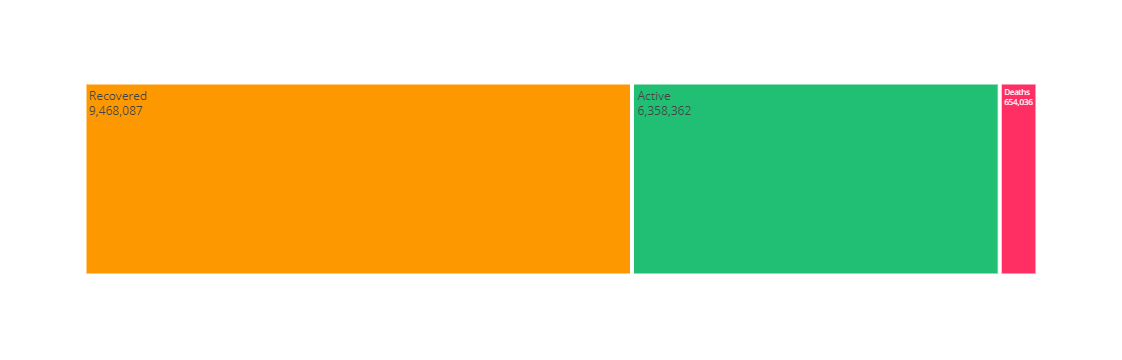

In [18]:
temp = day_wise[['Date','Deaths', 'Recovered', 'Active']].tail(1)
temp = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'])
fig = px.treemap(temp, path=["variable"], values="value", height=225, 
                 color_discrete_sequence=[act, rec, dth])
fig.data[0].textinfo = 'label+text+value'
fig.show()

# Maps

In [19]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

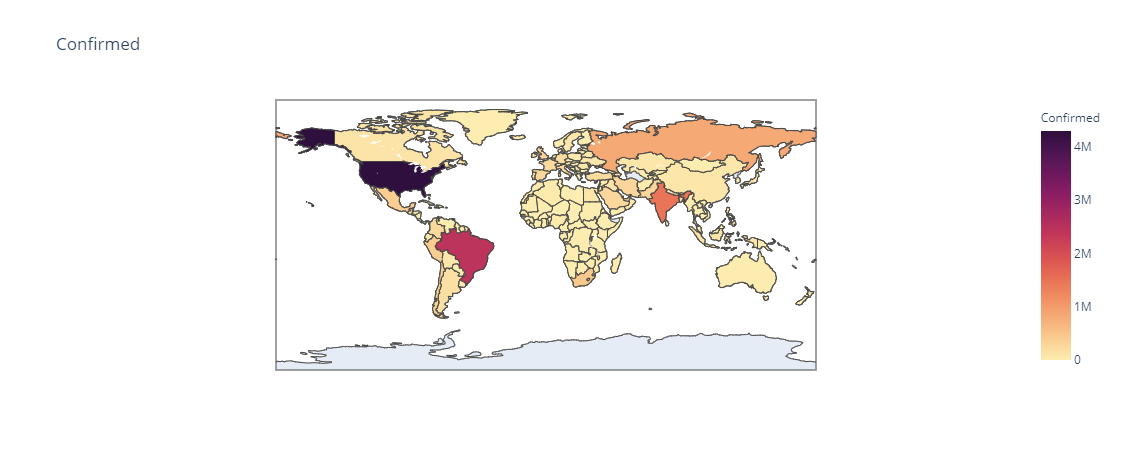

In [20]:
plot_map(country_wise, 'Confirmed', 'matter')

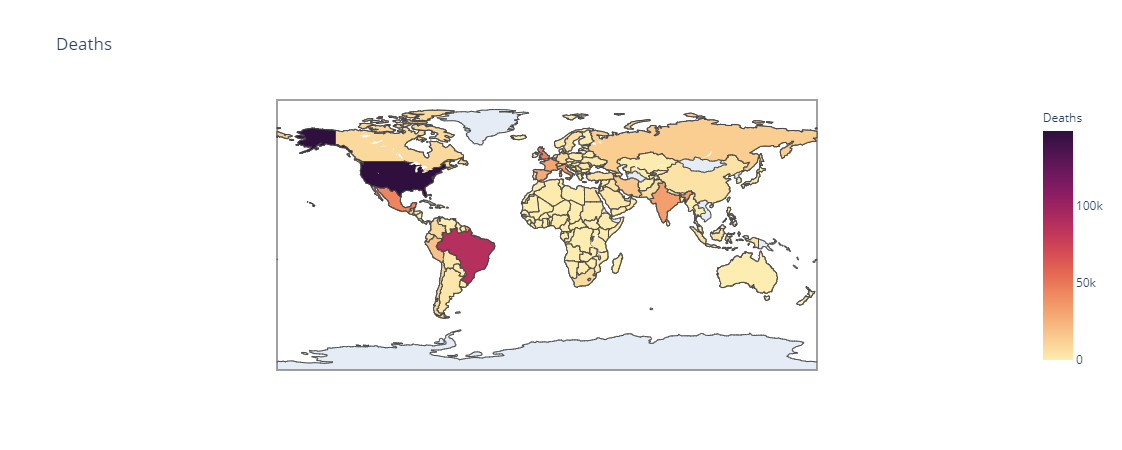

In [21]:
plot_map(country_wise, 'Deaths', 'matter')

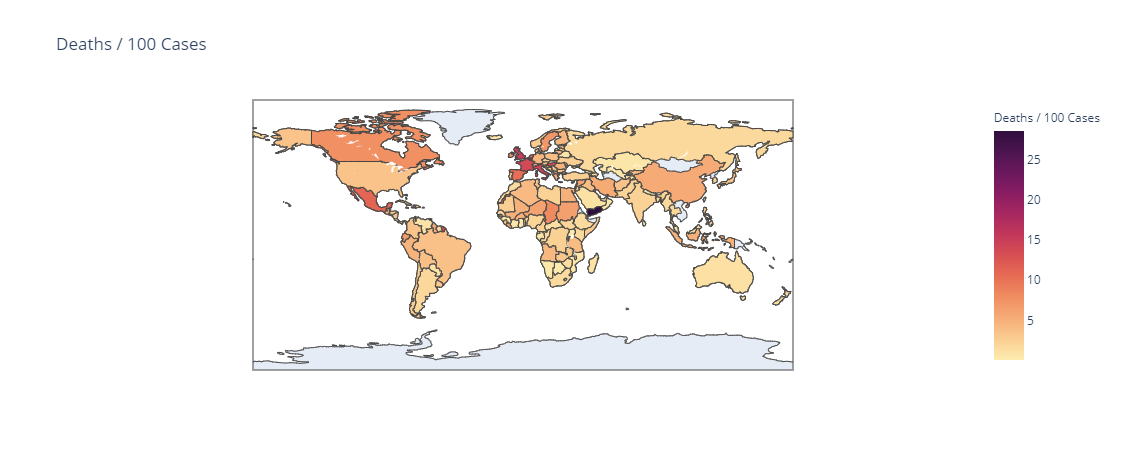

In [22]:
plot_map(country_wise, 'Deaths / 100 Cases', 'matter')

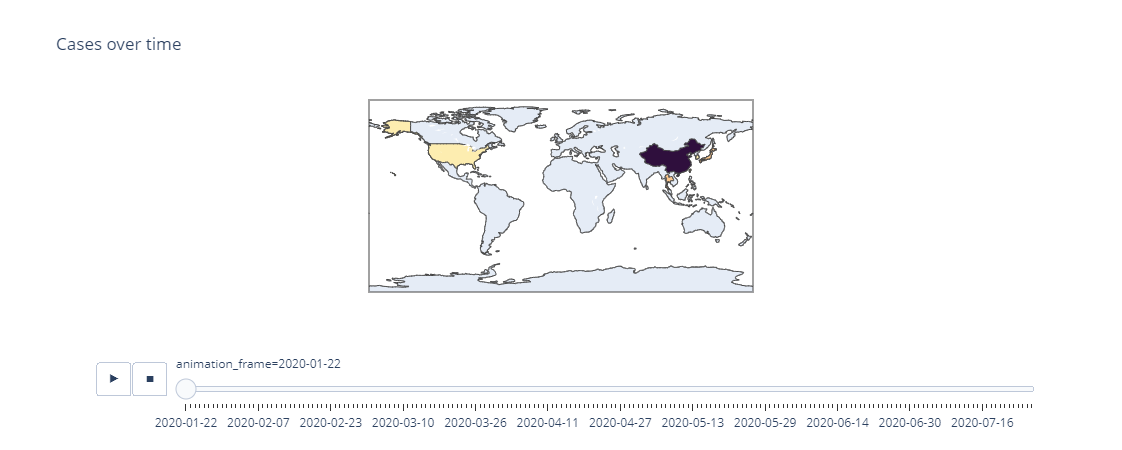

In [23]:
# Over the time

fig = px.choropleth(full_grouped, locations="Country/Region", 
                    color=np.log(full_grouped["Confirmed"]),
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=full_grouped["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.matter)
fig.update(layout_coloraxis_showscale=False)
fig.show()

# Cases over the time

In [24]:
def plot_daywise(col, hue):
    fig = px.bar(day_wise, x="Date", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [25]:
def plot_daywise_line(col, hue):
    fig = px.line(day_wise, x="Date", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [26]:
temp = full_grouped.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600, width=700,
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
plot_daywise('Confirmed', '#333333')

In [ ]:
plot_daywise('Active', '#333333')

In [ ]:
plot_daywise('New cases', '#333333')

In [ ]:
plot_daywise('Deaths', dth)

In [ ]:
plot_daywise('New deaths', dth)

In [ ]:
plot_daywise('Recovered', rec)

In [ ]:
plot_daywise('New recovered', rec)

In [ ]:
plot_daywise_line('Deaths / 100 Cases', dth)

In [ ]:
plot_daywise_line('Deaths / 100 Recovered', dth)

In [ ]:
plot_daywise_line('Recovered / 100 Cases', rec)

In [ ]:
plot_daywise('No. of countries', '#035aa6')

In [ ]:
temp = day_wise[['Date', 'Recovered', 'Active']]
temp = temp.melt(id_vars='Date', value_vars=['Recovered', 'Active'], 
                 var_name='Variable', value_name='Count')
px.line(temp, x='Date', y='Count', color='Variable')

# Top 20 Countries

In [ ]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [ ]:
def plot_hbar_wm(col, n, min_pop=1000000, sort='descending'):
    df = worldometer_data[worldometer_data['Population']>min_pop]
    df = df.sort_values(col, ascending=True).tail(n)
    fig = px.bar(df,
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700, 
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col+' (Only countries with > 1M Pop)', 
                      xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [ ]:
plot_hbar(country_wise, 'Confirmed', 15)

In [ ]:
plot_hbar(country_wise, 'Active', 15)

In [ ]:
plot_hbar(country_wise, 'New cases', 15)

In [ ]:
plot_hbar(country_wise, 'Deaths', 15)

In [ ]:
plot_hbar(country_wise, 'New deaths', 15)

In [ ]:
plot_hbar(country_wise, 'Deaths / 100 Cases', 15)

In [ ]:
plot_hbar(country_wise, 'Recovered', 15)

In [ ]:
plot_hbar(country_wise, 'New recovered', 15)

In [ ]:
plot_hbar(country_wise, 'Recovered / 100 Cases', 15)

In [ ]:
plot_hbar(country_wise, '1 week change', 15)

In [ ]:
plot_hbar(country_wise, '1 week % increase', 15)

In [ ]:
plot_hbar_wm('Tot Cases/1M pop', 15, 1000000)

In [ ]:
plot_hbar_wm('Deaths/1M pop', 15, 1000000)

In [ ]:
plot_hbar_wm('TotalTests', 15, 1000000)

In [ ]:
plot_hbar_wm('Tests/1M pop', 15)

# Date vs

In [ ]:
def plot_stacked(col):
    fig = px.bar(full_grouped, x="Date", y=col, color='Country/Region', 
                 height=600, title=col, 
                 color_discrete_sequence = px.colors.cyclical.mygbm)
    fig.update_layout(showlegend=True)
    fig.show()

In [ ]:
def plot_line(col):
    fig = px.line(full_grouped, x="Date", y=col, color='Country/Region', 
                  height=600, title=col, 
                  color_discrete_sequence = px.colors.cyclical.mygbm)
    fig.update_layout(showlegend=True)
    fig.show()

In [ ]:
plot_stacked('Confirmed')

In [ ]:
plot_stacked('Deaths')

In [ ]:
plot_stacked('New cases')

In [ ]:
plot_stacked('Active')

In [ ]:
plot_line('Confirmed')

In [ ]:
plot_line('Deaths')

In [ ]:
plot_line('New cases')

In [ ]:
plot_line('Active')

In [ ]:
temp = pd.merge(full_grouped[['Date', 'Country/Region', 'Confirmed', 'Deaths']], 
                day_wise[['Date', 'Confirmed', 'Deaths']], on='Date')
temp['% Confirmed'] = round(temp['Confirmed_x']/temp['Confirmed_y'], 3)*100
temp['% Deaths'] = round(temp['Deaths_x']/temp['Deaths_y'], 3)*100
temp.head()

In [ ]:
fig = px.bar(temp, x='Date', y='% Confirmed', color='Country/Region', 
             range_y=(0, 100), title='% of Cases from each country', 
             color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

In [ ]:
fig = px.bar(temp, x='Date', y='% Deaths', color='Country/Region', 
             range_y=(0, 100), title='% of Cases from each country', 
             color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

# Graph after 1M cases

In [ ]:
def gt_n(n):
    countries = full_grouped[full_grouped['Confirmed']>n]['Country/Region'].unique()
    temp = full_table[full_table['Country/Region'].isin(countries)]
    temp = temp.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()
    temp = temp[temp['Confirmed']>n]
    # print(temp.head())

    min_date = temp.groupby('Country/Region')['Date'].min().reset_index()
    min_date.columns = ['Country/Region', 'Min Date']
    # print(min_date.head())

    from_nth_case = pd.merge(temp, min_date, on='Country/Region')
    from_nth_case['Date'] = pd.to_datetime(from_nth_case['Date'])
    from_nth_case['Min Date'] = pd.to_datetime(from_nth_case['Min Date'])
    from_nth_case['N days'] = (from_nth_case['Date'] - from_nth_case['Min Date']).dt.days
    # print(from_nth_case.head())

    fig = px.line(from_nth_case, x='N days', y='Confirmed', color='Country/Region', 
                  title='N days from '+str(n)+' case', height=600)
    fig.show()

In [ ]:
gt_n(100000)

# Confirmed vs Deaths

In [ ]:
fig = px.scatter(country_wise.sort_values('Deaths', ascending=False).iloc[:20, :], 
                 x='Confirmed', y='Deaths', color='Country/Region', size='Confirmed', 
                 height=700, text='Country/Region', log_x=True, log_y=True, 
                 title='Deaths vs Confirmed (Scale is in log10)')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# Composition of Cases

In [ ]:
def plot_treemap(col):
    fig = px.treemap(country_wise, path=["Country/Region"], values=col, height=700,
                 title=col, color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [ ]:
plot_treemap('Confirmed')

In [ ]:
plot_treemap('Deaths')

# Bubble Plot

In [ ]:
def plot_bubble(col, pal):
    temp = full_grouped[full_grouped[col]>0].sort_values('Country/Region', ascending=False)
    fig = px.scatter(temp, x='Date', y='Country/Region', size=col, color=col, height=3000,
                    color_continuous_scale=pal)
    fig.update_layout(yaxis = dict(dtick = 1))
    fig.update(layout_coloraxis_showscale=False)
    fig.show()

In [ ]:
plot_bubble('New cases', 'Viridis')

In [ ]:
plot_bubble('Active', 'Viridis')

# Epidemic Span

In [ ]:
temp = full_grouped[['Date', 'Country/Region', 'New cases']]
temp['New cases reported ?'] = temp['New cases']!=0
temp['New cases reported ?'] = temp['New cases reported ?'].astype(int)
# temp.head()

In [ ]:
fig = go.Figure(data=go.Heatmap(
        z=temp['New cases reported ?'],
        x=temp['Date'],
        y=temp['Country/Region'],
        colorscale='Emrld',
        showlegend=False,
        text=temp['New cases reported ?']))

fig.update_layout(yaxis = dict(dtick = 1))
fig.update_layout(height=3000)
fig.show()

# Running Bar Chart

https://app.flourish.studio/visualisation/1571387/edit



In [ ]:
# HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1571387"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

# Country Wise

In [ ]:
# temp = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths']
# temp = temp.sum().diff().reset_index()

# mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

# temp.loc[mask, 'Confirmed'] = np.nan
# temp.loc[mask, 'Deaths'] = np.nan

# countries = full_table[full_table['Confirmed']>100000]['Country/Region'].unique()

# temp = temp[temp['Country/Region'].isin(countries)]


# n_cols = 3
# n_rows = math.ceil(len(countries)/n_cols)

# fig = make_subplots(rows=n_rows, cols=n_cols, shared_xaxes=False, subplot_titles=countries)

# for ind, country in enumerate(countries):
#     row = int((ind/n_cols)+1)
#     col = int((ind%n_cols)+1)
#     fig.add_trace(go.Bar(x=temp['Date'], y=temp.loc[temp['Country/Region']==country, 'Confirmed'], name=country), row=row, col=col)
    
# fig.update_layout(height=4000, title_text="No. of new cases in each Country")
# fig.update_layout(showlegend=False)
# fig.show()

# Comparison with similar epidemics

https://www.kaggle.com/imdevskp/covid19-vs-sars-vs-mers-vs-ebola-vs-h1n1



# Analysis on similar pandemic/epidemic/outbreak

https://www.kaggle.com/imdevskp/mers-outbreak-analysis  
https://www.kaggle.com/imdevskp/sars-2003-outbreak-analysis  
https://www.kaggle.com/imdevskp/western-africa-ebola-outbreak-analysis


# USA

In [ ]:
usa_df = pd.read_csv('../input/corona-virus-report/usa_county_wise.csv')
usa_latest = usa_df[usa_df['Date'] == max(usa_df['Date'])]
usa_grouped = usa_latest.groupby('Province_State')['Confirmed', 'Deaths'].sum().reset_index()

In [ ]:
us_code = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE', 'District of Columbia': 'DC', 
    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
    'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
    'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

usa_grouped['Code'] = usa_grouped['Province_State'].map(us_code)

In [ ]:
fig = px.choropleth(usa_grouped, color='Confirmed', locations='Code', locationmode="USA-states", 
                    scope="usa", color_continuous_scale="RdGy", title='No. of cases in USA')
fig

In [ ]:
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# fig = px.choropleth(usa_latest, geojson=counties, locations='FIPS', color='Confirmed',
#                            color_continuous_scale="Peach",
#                            scope="usa",
#                            labels={'Confirmed':'Confirmed'})
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

# WHO Region Wise

> *https://en.wikipedia.org/wiki/WHO_regions*

In [ ]:
who = country_wise.groupby('WHO Region')['Confirmed', 'Deaths', 'Recovered', 'Active',
                                         'New cases', 'Confirmed last week'].sum().reset_index()
who['Fatality Rate'] = round((who['Deaths'] / who['Confirmed']) * 100, 2)
who['Recovery Rate'] = (who['Recovered'] / who['Confirmed']) * 100

who_g = full_grouped.groupby(['WHO Region', 'Date'])['Confirmed', 'Deaths', 'Recovered', 
                                                     'Active','New cases', 'New deaths'].sum().reset_index()

In [ ]:
def plot_hbar(col, hover_data=[]):
    fig = px.bar(who.sort_values(col), 
                 x=col, y="WHO Region", color='WHO Region',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [ ]:
plot_hbar('Confirmed')

In [ ]:
plot_hbar('Deaths')

In [ ]:
plot_hbar('Fatality Rate')

In [ ]:
temp = worldometer_data[worldometer_data['WHO Region']!=0]

In [ ]:
fig = px.scatter(temp, x='TotalCases', y='TotalDeaths', color='WHO Region', 
                 height=700, hover_name='Country/Region', log_x=True, log_y=True, 
                 title='Confirmed vs Deaths',
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_traces(textposition='top center')
# fig.update_layout(showlegend=False)
# fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.scatter(temp, x='Population', y='TotalCases', color='WHO Region', 
                 height=700, hover_name='Country/Region', log_x=True, log_y=True, 
                 title='Population vs Confirmed',
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_traces(textposition='top center')
# fig.update_layout(showlegend=False)
# fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
px.bar(who_g, x="Date", y="Confirmed", color='WHO Region', 
       height=600, title='Confirmed', 
       color_discrete_sequence=px.colors.qualitative.Vivid)

In [ ]:
px.bar(who_g, x="Date", y="New cases", color='WHO Region', 
       height=600, title='New cases', 
       color_discrete_sequence=px.colors.qualitative.Vivid)

In [ ]:
px.box(worldometer_data, x='WHO Region', y='TotalCases', color='WHO Region',
       title='Distribution of country wise no. of cases in different WHO Region')

## Weekly Statistics

In [ ]:
full_grouped['Week No.'] = full_grouped['Date'].dt.strftime('%U')
week_wise = full_grouped.groupby('Week No.')['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'].sum().reset_index()

In [ ]:
def plot_weekwise(col, hue):
    fig = px.bar(week_wise, x="Week No.", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [ ]:
plot_weekwise('Confirmed', '#000000')

In [ ]:
plot_weekwise('Deaths', dth)

In [ ]:
plot_weekwise('New cases', '#cd6684')

## Monthly statistics

In [ ]:
full_grouped['Month'] = pd.DatetimeIndex(full_grouped['Date']).month
month_wise = full_grouped.groupby('Month')['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'].sum().reset_index()

In [ ]:
def plot_monthwise(col, hue):
    fig = px.bar(month_wise, x="Month", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [ ]:
plot_monthwise('Confirmed', '#000000')

In [ ]:
plot_monthwise('Deaths', dth)

In [ ]:
plot_monthwise('New cases', '#cd6684')

# Countries with no more active cases

In [ ]:
temp = country_wise[country_wise['Active']==0]
temp = temp.sort_values('Confirmed', ascending=False)
temp.reset_index(drop=True)

# Healthy life expectancy vs Deaths / 100 Cases

In [ ]:
happiness_report = pd.read_csv('../input/world-happiness/2019.csv')
happiness_report = happiness_report[['Country or region', 'Healthy life expectancy']]

temp = country_wise.merge(happiness_report, left_on='Country/Region', right_on='Country or region')
px.scatter(temp, y='Deaths / 100 Cases', x='Healthy life expectancy', color='WHO Region', hover_data=['Country/Region'])